In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# import a text file and convert it to a numpy array

# Define the file pathm
file_path = 'M3spectra_ashwin.txt'  # Replace with actual file path

# Load the data, skipping the first 5 header lines
data = np.loadtxt(file_path, skiprows=5)

wavelength = data[2:, 0]   # Column 1: Wavelength
column_2 = data[2:, 1]     # Column 2: X:158 Y:6353
column_3 = data[2:, 2]     # Column 3: X:167 Y:6101
column_4 = data[2:, 3]     # Column 4: X:85 Y:6291

# Print the data to verify
print("Wavelength:", wavelength)
print("Column 2:", column_2)
print("Column 3:", column_3)
print("Column 4:", column_4)


Wavelength: [  540.840027   580.76001    620.690002   660.609985   700.539978
   730.47998    750.440002   770.400024   790.369995   810.330017
   830.289978   850.25       870.210022   890.169983   910.140015
   930.099976   950.059998   970.02002    989.97998   1009.950012
  1029.910034  1049.869995  1069.829956  1089.790039  1109.76001
  1129.719971  1149.680054  1169.640015  1189.599976  1209.569946
  1229.530029  1249.48999   1269.449951  1289.410034  1309.380005
  1329.339966  1349.300049  1369.26001   1389.219971  1409.189941
  1429.150024  1449.109985  1469.069946  1489.030029  1508.98999
  1528.959961  1548.920044  1578.859985  1618.790039  1658.709961
  1698.630005  1738.560059  1778.47998   1818.400024  1858.329956
  1898.25      1938.180054  1978.099976  2018.02002   2057.949951
  2097.870117  2137.800049  2177.719971  2217.639893  2257.570068
  2297.48999   2337.419922  2377.340088  2417.26001   2457.189941
  2497.110107  2537.030029  2576.959961  2616.879883  2656.810059


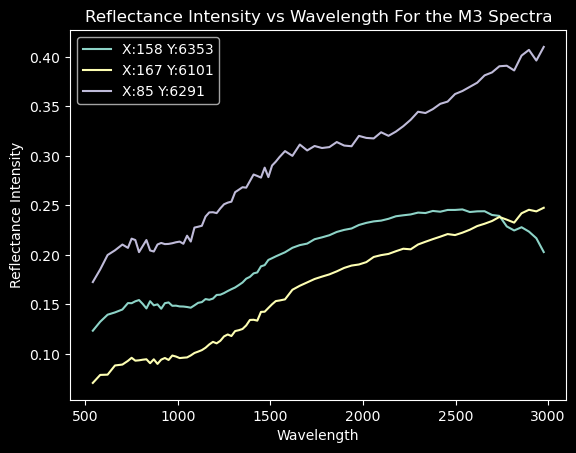

In [23]:
plt.plot(wavelength, column_2, label='X:158 Y:6353')
plt.plot(wavelength, column_3, label='X:167 Y:6101')
plt.plot(wavelength, column_4, label='X:85 Y:6291')
plt.legend()
plt.xlabel('Wavelength')
plt.ylabel('Reflectance Intensity')
plt.title('Reflectance Intensity vs Wavelength For the M3 Spectra')
plt.show()

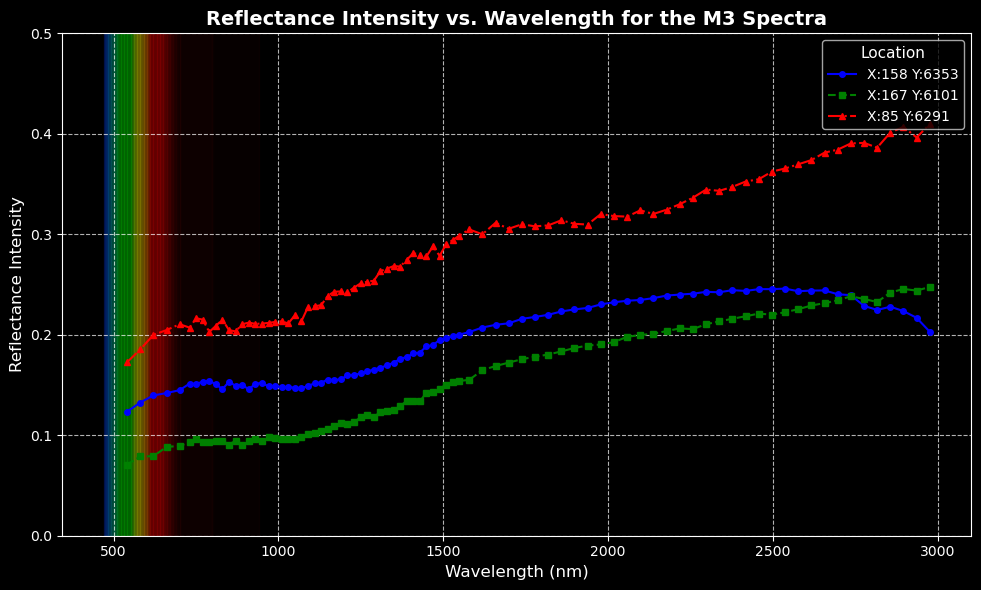

In [27]:

# Plot with additional styling
plt.figure(figsize=(10, 6))  # Set a larger figure size for clarity

# Plot each dataset with unique colors and line styles
plt.plot(wavelength, column_2, label='X:158 Y:6353', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(wavelength, column_3, label='X:167 Y:6101', color='green', linestyle='--', marker='s', markersize=4)
plt.plot(wavelength, column_4, label='X:85 Y:6291', color='red', linestyle='-.', marker='^', markersize=4)

# Enhance legend with additional description
plt.legend(title="Location", loc='upper right', fontsize=10, title_fontsize='11')

# Set labels and title with larger fonts
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance Intensity', fontsize=12)
plt.title('Reflectance Intensity vs. Wavelength for the M3 Spectra', fontsize=14, fontweight='bold')

# Add grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# # Annotate a few interesting points
# plt.annotate('Peak', xy=(wavelength[5], column_2[5]), xytext=(wavelength[5] + 50, column_2[5] + 0.5),
#              arrowprops=dict(facecolor='black', arrowstyle='->'))
# plt.annotate('Dip', xy=(wavelength[10], column_3[10]), xytext=(wavelength[10] - 100, column_3[10] - 0.5),
#              arrowprops=dict(facecolor='black', arrowstyle='->'))

# Adjust ticks for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt_spec()
plt.ylim(0, 0.5)

plt.show()

In [16]:
import colour
import matplotlib.colors as mcolors

def wavelength_to_hex(wavelength):
    # Convert wavelength to XYZ color space
    xyz = colour.wavelength_to_XYZ(wavelength)
    
    # Convert XYZ to RGB
    rgb = colour.XYZ_to_sRGB(xyz)
    
    # Ensure RGB values are within bounds (0, 1) and then scale to (0, 255)
    rgb = [max(0, min(1, c)) for c in rgb]
    rgb = [int(c * 255) for c in rgb]
    
    # Convert to hex
    hex_color = mcolors.to_hex([x / 255.0 for x in rgb])
    
    return hex_color

# Example: Convert 500 nm (greenish) to hex
wavelength = 500  # Wavelength in nanometers
hex_color = wavelength_to_hex(wavelength)
print(f"Wavelength {wavelength} nm corresponds to hex color {hex_color}")


Wavelength 500 nm corresponds to hex color #00cd81


In [60]:

plt.style.use('dark_background')
def plt_spec():    
    # Wavelength range for the plot
    x = np.linspace(470, 700, 100)  # Generate wavelength values from 400 to 1000 nm
    y = 1  # Example function to plot
    
    # Create a plot
    #fig, ax = plt.subplots(figsize=(10, 7))
    
    # Loop over each color range and create a rectangle with the corresponding color
    for i in range(len(x)-1):
        color = wavelength_to_hex(x[i])
        a = x[i]+1
        plt.fill_between(x, y, where=(x >= x[i]) & (x <= x[i]+5), color=color, alpha=0.1)
    
    color_ranges = {
        'IRed': (700, 800),
        'IRed2': (800, 940)
    }
    
    # Define the corresponding colors
    color_map = {
        'IRed': '#440000',
        'IRed2': '#220000'
    }
    # Wavelength range for the plot
    x = np.linspace(470, 940, 1000)  # Generate wavelength values from 400 to 1000 nm
    y = 1  # Example function to plot
    
    
    # Loop over each color range and create a rectangle with the corresponding color
    for color, (start_wl, end_wl) in color_ranges.items():
        plt.fill_between(x, y, where=(x >= start_wl) & (x <= end_wl), color=color_map[color], alpha=0.1)#, label=f"{start}-{end} nm")

    #plt.figsize=(10, 7)


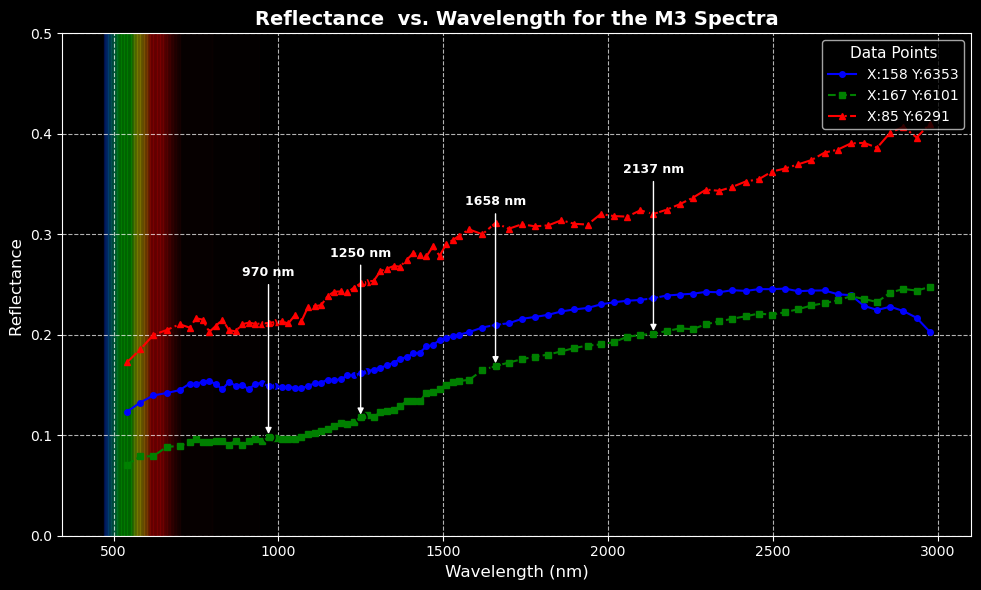

In [62]:
import matplotlib.pyplot as plt

# Plot with additional styling
plt.figure(figsize=(10, 6))  # Set a larger figure size for clarity

# Plot each dataset with unique colors and line styles
plt.plot(wavelength, column_2, label='X:158 Y:6353', color='blue', linestyle='-', marker='o', markersize=4)
plt.plot(wavelength, column_3, label='X:167 Y:6101', color='green', linestyle='--', marker='s', markersize=4)
plt.plot(wavelength, column_4, label='X:85 Y:6291', color='red', linestyle='-.', marker='^', markersize=4)

# Highlight specific wavelengths with circles and annotations
highlight_wavelengths = [970, 1250, 1658, 2137]
for wl in highlight_wavelengths:
    # Find the closest wavelength index in the data for annotation
    idx = (np.abs(wavelength - wl)).argmin()
    
    # Circle the specific points
    plt.plot(wavelength[idx], column_2[idx], 'o', color='black', markersize=8, fillstyle='none', linewidth=1.5)
    plt.plot(wavelength[idx], column_3[idx], 'o', color='black', markersize=8, fillstyle='none', linewidth=1.5)
    plt.plot(wavelength[idx], column_4[idx], 'o', color='black', markersize=8, fillstyle='none', linewidth=1.5)
    
    # Annotate the points
    # plt.annotate(f'{wl} nm', xy=(wavelength[idx], column_3[idx]), 
    #              xytext=(wavelength[idx], column_3[idx]+0.16),
    #              arrowprops=dict(facecolor='white', arrowstyle='-|>'),
    #              fontsize=9, color='white', fontweight='bold')
    # Annotate the points with a straight vertical arrow
    plt.annotate(f'{wl} nm', 
             xy=(wavelength[idx], column_3[idx]), 
             xytext=(wavelength[idx], column_3[idx] + 0.16),  # Same x-coordinate for vertical alignment
             arrowprops=dict(facecolor='white', arrowstyle='-|>'),  # Straight vertical arrow
             fontsize=9, color='white', fontweight='bold', ha='center')


# Enhance legend with additional description
plt.legend(title="Data Points", loc='upper right', fontsize=10, title_fontsize='11')

# Set labels and title with larger fonts
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance ', fontsize=12)
plt.title('Reflectance  vs. Wavelength for the M3 Spectra', fontsize=14, fontweight='bold')

# Add grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust ticks for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt_spec()
plt.ylim(0, 0.5)
plt.show()


In [57]:
w = np.array([970, 1250, 1658, 2137])
print(w*10**-3)

[ 0.97   1.25   1.658  2.137]
